In [9]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns

In [4]:
survey=pd.read_csv("mspa-survey-data.csv")

First, we will explore the data and take a brief look at each variable, paying close attention to count(indicative of missing data) and any noticeable difference between the min/max and quartiles.

In [5]:
survey.describe()

,RespondentID,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,...,Industry_JavaScalaSpark,Industry_JavaScriptHTMLCSS,Industry_Python,Industry_R,Industry_SAS,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,Courses_Completed
count,2.070000e+02,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,206.000000,200.000000,203.000000,200.000000,187.000000
mean,5.119017e+09,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,...,11.942029,6.966184,29.772947,32.434783,18.884058,73.529126,58.045000,55.201970,53.630000,6.342246
std,6.677436e+06,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,...,14.706399,10.030721,17.959816,15.912209,19.137623,29.835429,32.588079,34.147954,33.539493,3.170849
min,5.109807e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.112944e+09,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,...,0.000000,0.000000,20.000000,22.500000,0.000000,53.000000,29.500000,25.000000,21.500000,4.000000
50%,5.116997e+09,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,...,5.000000,0.000000,30.000000,30.000000,15.000000,82.500000,60.000000,60.000000,51.500000,6.000000
75%,5.124485e+09,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,...,20.000000,10.000000,40.000000,40.000000,30.000000,100.000000,89.250000,85.000000,80.250000,9.000000
max,5.135740e+09,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,...,70.000000,50.000000,95.000000,85.000000,100.000000,100.000000,100.000000,100.000000,100.000000,12.000000


From this table, we can see that there were likely 207 respondents, and that they all completed the first 15 questions that asked to divide 100 points among five software options in the context of personal desire to learn, professional use, and industry use. It appears that there is missing data in the rest of the questions that assess course interest and the number of courses already completed. There isn't any further information immediately apparent from this table.

We can also use info() to look at the variable type and assess which variables will be feasible for statistical analyses.

In [7]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
RespondentID                        207 non-null int64
Personal_JavaScalaSpark             207 non-null int64
Personal_JavaScriptHTMLCSS          207 non-null int64
Personal_Python                     207 non-null int64
Personal_R                          207 non-null int64
Personal_SAS                        207 non-null int64
Professional_JavaScalaSpark         207 non-null int64
Professional_JavaScriptHTMLCSS      207 non-null int64
Professional_Python                 207 non-null int64
Professional_R                      207 non-null int64
Professional_SAS                    207 non-null int64
Industry_JavaScalaSpark             207 non-null int64
Industry_JavaScriptHTMLCSS          207 non-null int64
Industry_Python                     207 non-null int64
Industry_R                          207 non-null int64
Industry_SAS                        207 non-null int64
Python_Course_I

Initially, I wanted to look at the distribution of points among software options for a personal use, as I figured this would somewhat align with all facets of the person's life, such as career and desired industry. I wanted to look for any possible trends, so I made a pairplot.

In [8]:
survey_persint=survey.iloc[:,1:6]

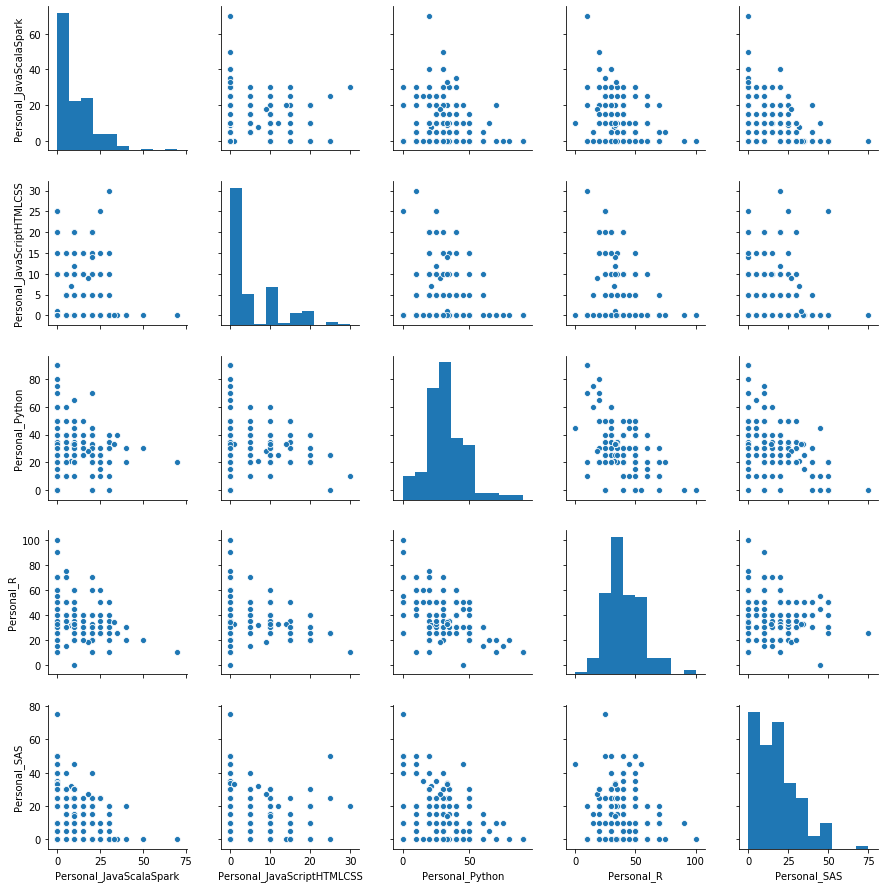

In [10]:
sns.pairplot(survey_persint)

There seems to be some kind of trend between the desire to learn Python and the desire to learn R, as you can see a downward-sloping linear relationship. We will keep this in mind, but first I want to examine each software type individually to assess for distribution and skewness.

(array([11., 13., 53., 65., 29., 26.,  3.,  3.,  2.,  2.]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <a list of 10 Patch objects>)

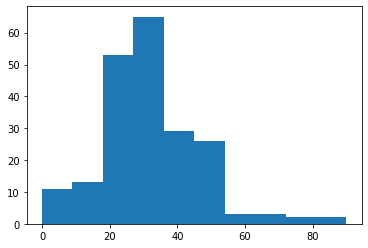

In [11]:
plt.pyplot.hist(survey.Personal_Python)

(array([ 1.,  8., 39., 66., 38., 37.,  8.,  8.,  0.,  2.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

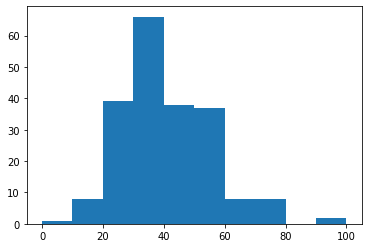

In [12]:
plt.pyplot.hist(survey.Personal_R)

(array([102.,  37.,  39.,  12.,  12.,   3.,   0.,   1.,   0.,   1.]),
 array([ 0.,  7., 14., 21., 28., 35., 42., 49., 56., 63., 70.]),
 <a list of 10 Patch objects>)

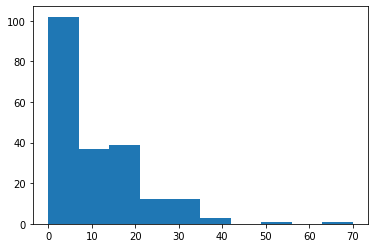

In [13]:
plt.pyplot.hist(survey.Personal_JavaScalaSpark)

(array([118.,  27.,   1.,  33.,   2.,  10.,  12.,   0.,   3.,   1.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

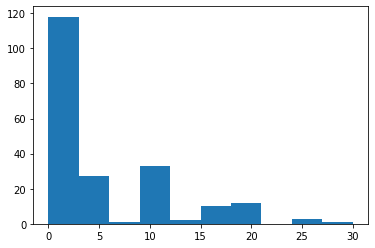

In [14]:
plt.pyplot.hist(survey.Personal_JavaScriptHTMLCSS)

(array([54., 41., 50., 26., 20.,  5., 10.,  0.,  0.,  1.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <a list of 10 Patch objects>)

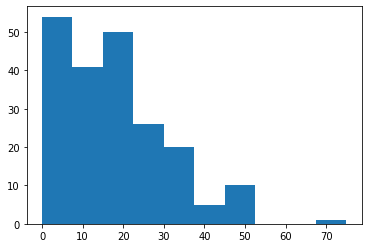

In [15]:
plt.pyplot.hist(survey.Personal_SAS)

I thought this would be interesting to look at since we are in a Python course.

(array([10.,  5.,  9.,  9.,  4., 16., 13., 22., 23., 95.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

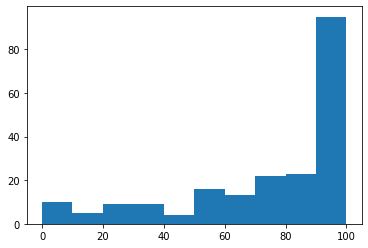

In [21]:
plt.pyplot.hist(survey.Python_Course_Interest)

In [22]:
survey.Python_Course_Interest.describe()

count    206.000000
mean      73.529126
std       29.835429
min        0.000000
25%       53.000000
50%       82.500000
75%      100.000000
max      100.000000
Name: Python_Course_Interest, dtype: float64

In [56]:
survey.sub=survey.iloc[:,1:16]

In [57]:
survey.sub.corr=survey.sub.corr()

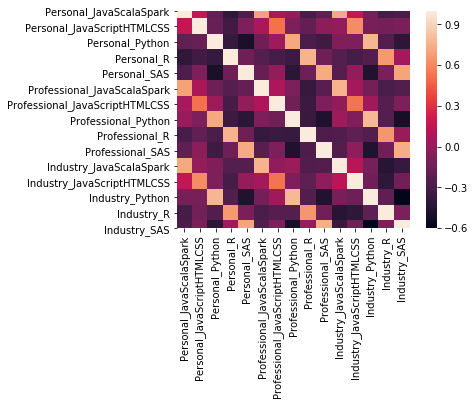

In [58]:
sns.heatmap(survey.sub.corr, square=True)

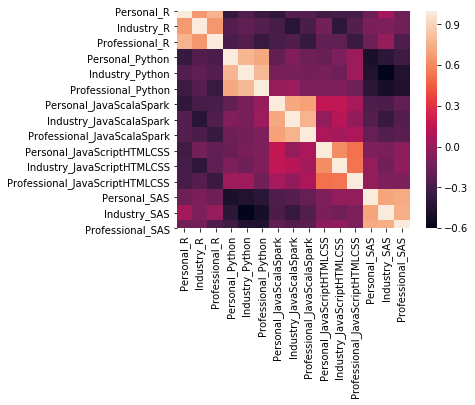

In [59]:
df=pd.DataFrame(data=(survey.Personal_R, survey.Industry_R, survey.Professional_R, survey.Personal_Python, survey.Industry_Python, survey.Professional_Python, survey.Personal_JavaScalaSpark, survey.Industry_JavaScalaSpark, survey.Professional_JavaScalaSpark, survey.Personal_JavaScriptHTMLCSS, survey.Industry_JavaScriptHTMLCSS, survey.Professional_JavaScriptHTMLCSS, survey.Personal_SAS, survey.Industry_SAS, survey.Professional_SAS))
df=df.transpose()
corr=df.corr()
sns.heatmap(corr, square=True)

The following code is to transform and scale two variables- Python_Course_Interest and Analytics_App_Course_Interest. We want to ensure that the transformed variables have roughly the same distribution shape as the original data.

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [30]:
Python=survey.Python_Course_Interest[~np.isnan(survey.Python_Course_Interest)]

In [33]:
Python=np.asarray(Python)

In [34]:
Python=Python.reshape(-1,1)

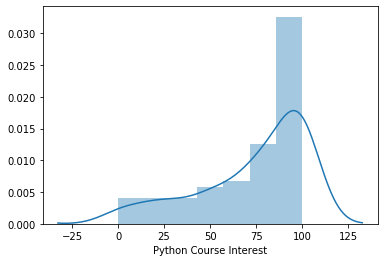

In [36]:
sns.distplot(Python, axlabel="Python Course Interest")

In [35]:
Python_SS=StandardScaler().fit_transform(Python)

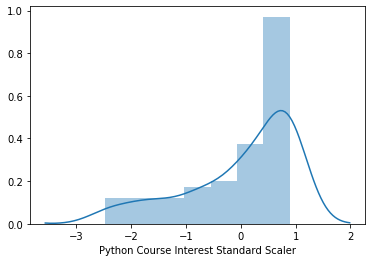

In [37]:
sns.distplot(Python_SS, axlabel="Python Course Interest Standard Scaler")

In [39]:
Python_MM=MinMaxScaler().fit_transform(Python)

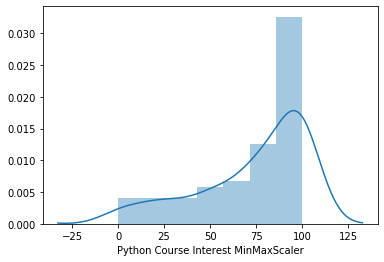

In [40]:
sns.distplot(Python, axlabel="Python Course Interest MinMaxScaler")

(array([23., 10., 30., 11., 10., 17.,  7., 28., 19., 48.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

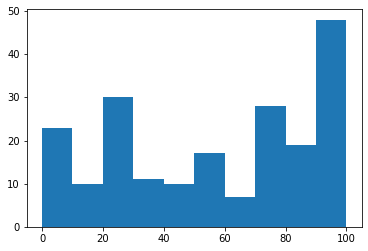

In [45]:
plt.pyplot.hist(survey.Analytics_App_Course_Interest)

In [41]:
survey.Analytics_App_Course_Interest.describe()

count    203.000000
mean      55.201970
std       34.147954
min        0.000000
25%       25.000000
50%       60.000000
75%       85.000000
max      100.000000
Name: Analytics_App_Course_Interest, dtype: float64

In [46]:
Analytics=survey.Analytics_App_Course_Interest[~np.isnan(survey.Analytics_App_Course_Interest)]

In [48]:
Analytics=np.asarray(Analytics)

In [49]:
Analytics=Analytics.reshape(-1,1)

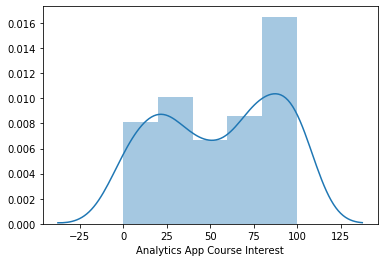

In [52]:
sns.distplot(Analytics, axlabel="Analytics App Course Interest")

In [50]:
Analytics_SS=StandardScaler().fit_transform(Analytics)

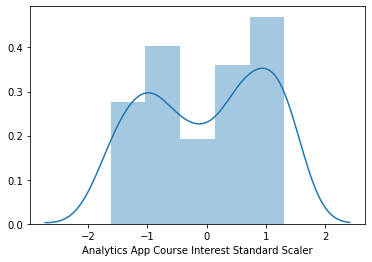

In [53]:
sns.distplot(Analytics_SS, axlabel="Analytics App Course Interest Standard Scaler")

In [54]:
Analytics_MM=MinMaxScaler().fit_transform(Analytics)

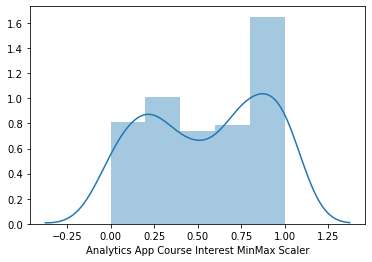

In [55]:
sns.distplot(Analytics_MM, axlabel="Analytics App Course Interest MinMax Scaler")